## 09 - Python Finance

**Capitulo 09**: Utilizar base de dados Alpha Vantage para ter acesso a cotações de empresas brasileiras e estrangeiras.

## 1. Configurações Iniciais

## 1.1 Instalação

In [ ]:
# install the package use:
!pip install alpha_vantage pandas requests

## 1.2 Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 8)

## 1.1 Chave de Acesso a API da Alpha Vantage

To get data from the API, simply import the library and call the object with your API key. Next, get ready for some awesome, free, realtime finance data. Your API key may also be stored in the environment variable ALPHAVANTAGE_API_KEY

In [10]:
#ALPHAVANTAGE_API_KEY = 'cole aqui sua chave obtida no site alphavantage.co'
#ALPHAVANTAGE_API_KEY = 'PXDKJ8UBNH2WPMVETESTE'

In [3]:
ALPHAVANTAGE_API_KEY = 'ODZSTGW6I9J0WCX9TESTE'

## 2. Acessando a API

In [16]:
ts.get_symbol_search('bovespa')

(           1. symbol                          2. name  ... 8. currency 9. matchScore
 date                                                   ...                          
 1970-01-01  INDX.SAO  BOVESPA INDUSTRIAL SECTOR INDEX  ...         BRL        0.3684
 
 [1 rows x 9 columns], None)

In [18]:
ts.get_symbol_search('IBOV')

(                                1. symbol  ... 9. matchScore
 date                                       ...              
 1970-01-01 00:00:00.000000000  IBOV11.SAO  ...        0.8000
 1970-01-01 00:00:00.000000001    IBOV.SAO  ...        0.7273
 
 [2 rows x 9 columns], None)

## 3. Utilização

In [5]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=ALPHAVANTAGE_API_KEY)
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('GOOGL')

The library supports giving its results as json dictionaries (default), pandas dataframe (if installed) or csv, simply pass the parameter output_format='pandas' to change the format of the output for all the API calls in the given class.

In [6]:
ts = TimeSeries(key=ALPHAVANTAGE_API_KEY, output_format='pandas')

The pandas data frame given by the call, can have either a date string indexing or an integer indexing (by default the indexing is 'date'), depending on your needs, you can use both.

In [ ]:
# For the default date string index behavior
ts = TimeSeries(key=ALPHAVANTAGE_API_KEY,output_format='pandas', indexing_type='date')
# For the default integer index behavior
ts = TimeSeries(key=ALPHAVANTAGE_API_KEY,output_format='pandas', indexing_type='integer')

## 3.1 Data frame structure

The data frame structure is given by the call on alpha vantage rest API. The column names of the data frames are the ones given by their data structure. For example, the following call:

In [14]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key=ALPHAVANTAGE_API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='GOOGL',interval='1min', outputsize='full')
pprint(data.head(2))

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2021-03-26 18:38:00  2024.69  2024.69  2024.69   2024.69      102.0
2021-03-26 17:09:00  2024.73  2024.73  2024.73   2024.73      105.0


The headers from the data are specified from Alpha Vantage (in previous versions, the numbers in the headers were removed, but long term is better to have the data exactly as Alpha Vantage produces it.)

## 3.2 Plotting

**Time Series**

Using pandas support we can plot the intra-minute value for 'MSFT' stock quite easily:

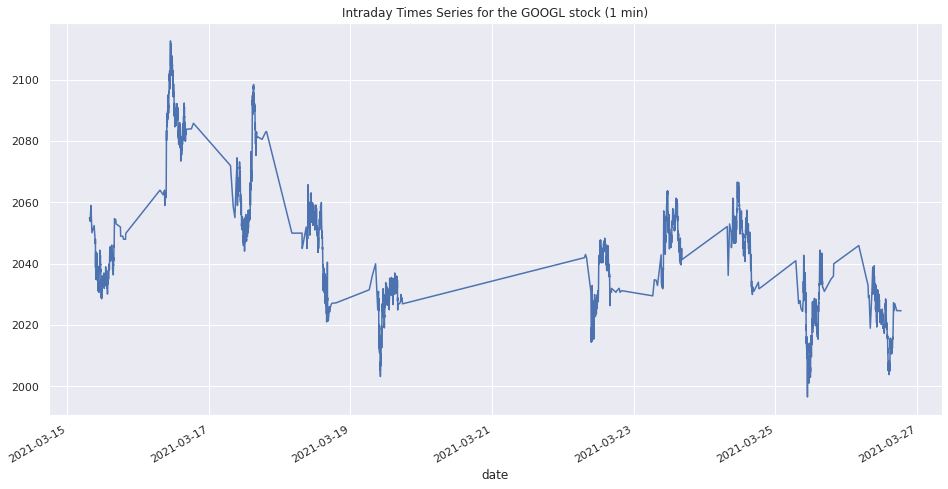

In [19]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key=ALPHAVANTAGE_API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='GOOGL',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the GOOGL stock (1 min)')
plt.show()

**Technical indicators**

The same way we can get pandas to plot technical indicators like Bollinger Bands®

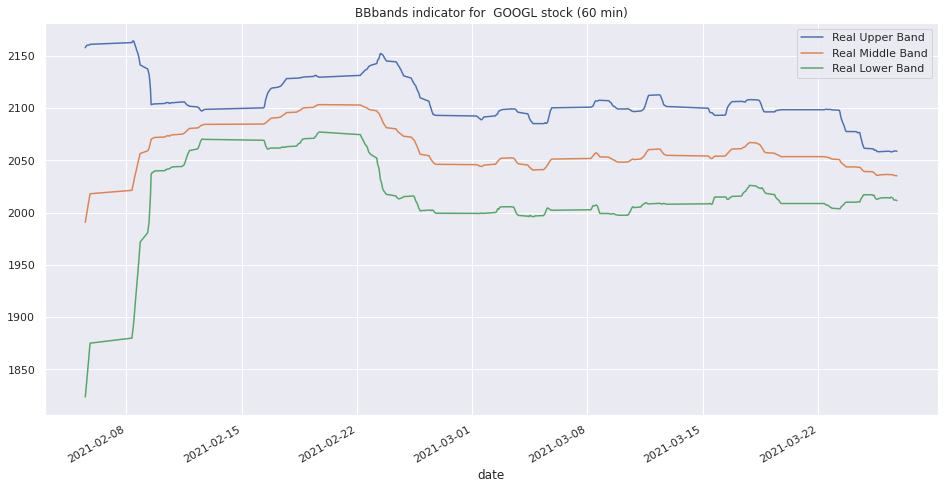

In [20]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=ALPHAVANTAGE_API_KEY, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='GOOGL', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  GOOGL stock (60 min)')
plt.show()

**Sector Performance**

We can also plot sector performance just as easy:

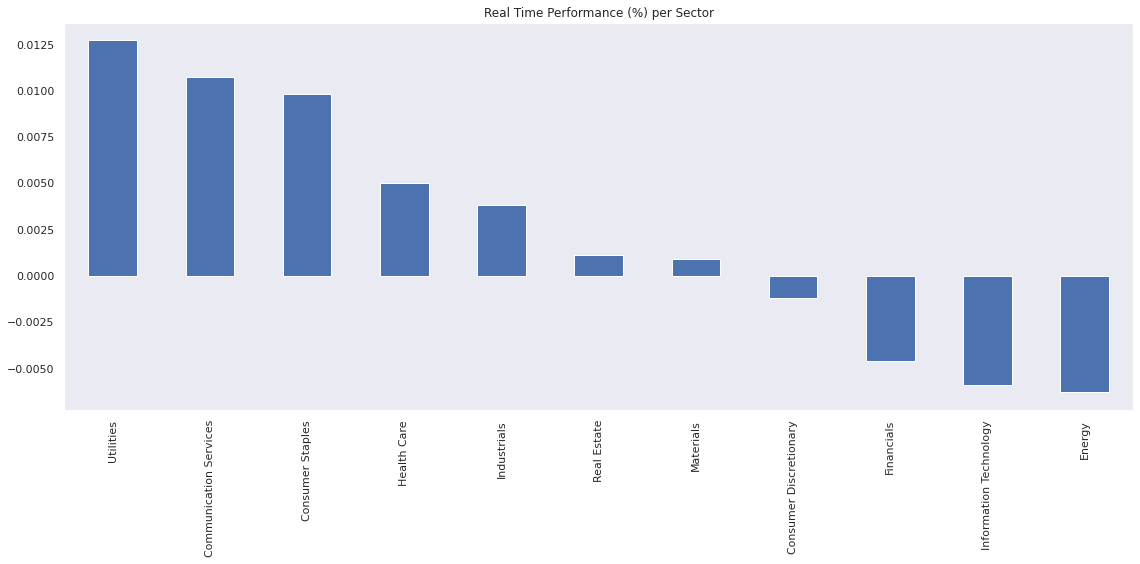

In [21]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=ALPHAVANTAGE_API_KEY, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

**Crypto currencies.**

We can also plot crypto currencies prices like BTC:

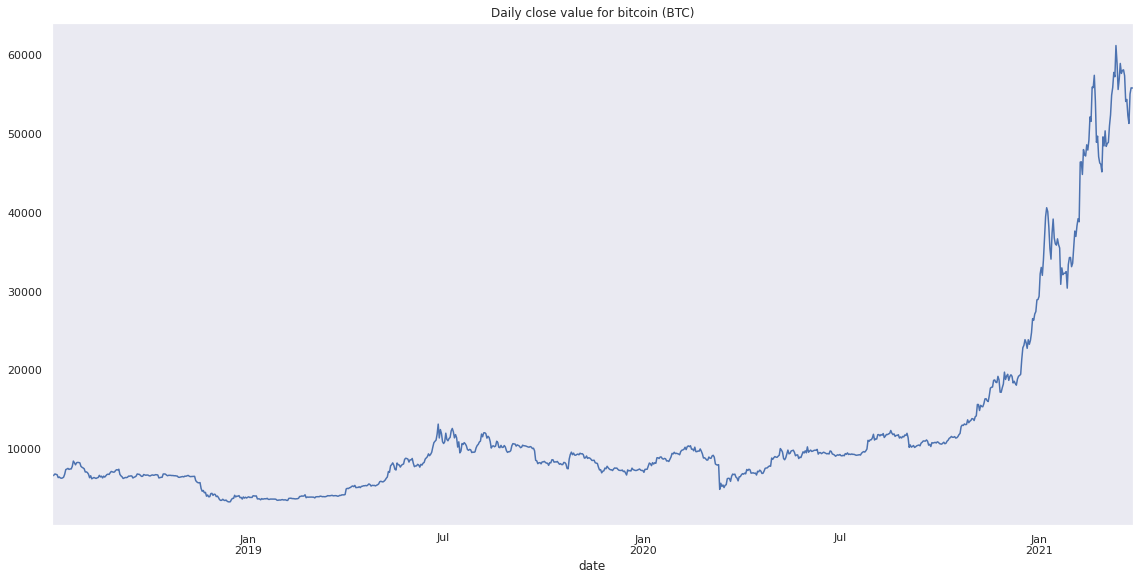

In [22]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key=ALPHAVANTAGE_API_KEY, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='USD')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

**Foreign Exchange (FX)**

The foreign exchange endpoint has no metadata, thus only available as json format and pandas (using the 'csv' format will raise an Error)

In [23]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key=ALPHAVANTAGE_API_KEY)
# There is no metadata in this call
data, _ = cc.get_currency_exchange_rate(from_currency='BTC',to_currency='USD')
pprint(data)

{'1. From_Currency Code': 'BTC',
 '2. From_Currency Name': 'Bitcoin',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '57740.90000000',
 '6. Last Refreshed': '2021-03-29 19:29:01',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '57740.90000000',
 '9. Ask Price': '57740.91000000'}


## 3. Análise

In [25]:
ALPHAVANTAGE_API_KEY = '9DE8M4Z80PTU2272TESTE'

In [28]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time
import datetime as dt

ts = TimeSeries (key=ALPHAVANTAGE_API_KEY, output_format = "pandas")

### STOCK TIME SERIES > DAILY ADJUSTED ###

# Date / Open / High / Low / Close / Adjusted Close / Volume / Dividend / Split
data_daily, meta_data = ts.get_daily_adjusted(symbol='GOOGL', outputsize ='compact')
# data_daily['column name'][row number]
data_daily_lastOpenPrice = data_daily['1. open'][0]
data_daily_lastHighPrice = data_daily['2. high'][0]
data_daily_lastLowPrice = data_daily['3. low'][0]
data_daily_lastAdjustedClosingPrice = data_daily['5. adjusted close'][0]
data_daily_lastTradingVolume = data_daily['6. volume'][0]
data_daily_lastDividendAmount = data_daily['7. dividend amount'][0]
data_daily

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-03-26,2031.7900,2039.385,2003.8500,2024.73,2024.73,1398875.0,0.0,1.0
2021-03-25,2029.0500,2045.640,1996.0900,2032.46,2032.46,1780787.0,0.0,1.0
2021-03-24,2051.7600,2067.600,2029.0001,2032.53,2032.53,1260853.0,0.0,1.0
2021-03-23,2039.9500,2064.110,2028.0001,2041.33,2041.33,1425456.0,0.0,1.0
2021-03-22,2027.6300,2048.340,2014.0000,2030.69,2030.69,1676771.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2020-11-06,1751.3400,1768.495,1736.6800,1759.73,1759.73,1431084.0,0.0,1.0
2020-11-05,1770.4500,1791.818,1741.0300,1762.50,1762.50,1987907.0,0.0,1.0
2020-11-04,1705.5803,1770.030,1703.0000,1745.85,1745.85,3567149.0,0.0,1.0


In [29]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime

start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,1,1)

GOOGL = web.DataReader('GOOGL', 'av-daily', start, end,api_key=ALPHAVANTAGE_API_KEY)
GOOGL

,open,high,low,close,volume
2020-01-02,1348.41,1368.68,1346.49,1368.68,1364265
2020-01-03,1348.00,1373.75,1347.32,1361.52,1170629
2020-01-06,1351.63,1398.32,1351.00,1397.81,2339343
2020-01-07,1400.46,1403.50,1391.56,1395.11,1726456
2020-01-08,1394.82,1411.85,1392.63,1405.04,1766274
...,...,...,...,...,...
2020-12-24,1729.00,1742.41,1724.35,1734.16,465638
2020-12-28,1744.91,1787.00,1741.82,1773.96,1379642
2020-12-29,1787.23,1788.47,1755.11,1757.76,986287
2020-12-30,1765.00,1767.76,1728.00,1736.25,1051308


In [30]:
    import os
    from datetime import datetime
    import pandas_datareader.data as web

    df = web.DataReader("GOOGL", "av-daily", start=datetime(2020, 1, 1),end=datetime(2021, 1, 31),api_key=ALPHAVANTAGE_API_KEY) 
    print(df)

               open      high        low    close   volume
2020-01-02  1348.41  1368.680  1346.4900  1368.68  1364265
2020-01-03  1348.00  1373.750  1347.3200  1361.52  1170629
2020-01-06  1351.63  1398.320  1351.0000  1397.81  2339343
2020-01-07  1400.46  1403.500  1391.5600  1395.11  1726456
2020-01-08  1394.82  1411.850  1392.6300  1405.04  1766274
...             ...       ...        ...      ...      ...
2021-01-25  1912.74  1921.820  1859.1600  1894.28  2529346
2021-01-26  1885.99  1915.750  1876.1300  1907.95  1573078
2021-01-27  1874.91  1880.470  1797.2800  1818.94  4125631
2021-01-28  1831.00  1887.990  1831.0000  1853.20  2763905
2021-01-29  1834.02  1847.535  1801.5601  1827.36  2226509

[272 rows x 5 columns]


In [31]:
from alpha_vantage.timeseries import TimeSeries
API_KEY = ALPHAVANTAGE_API_KEY
import matplotlib.pyplot as plt
ts = TimeSeries(key=API_KEY)
dados, meta_dados = ts.get_daily(symbol='GOOGL', outputsize='full')

## 4. Resultados


In [ ]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys

def stockchart(symbol):
    ts = TimeSeries(key=ALPHAVANTAGE_API_KEY, output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval='1min', outputsize='full')
    print data
    data['close'].plot()
    plt.title('Stock chart')
    plt.show()

In [ ]:
symbol=raw_input("Enter symbol name:")
stockchart(symbol)

In [32]:
ts = TimeSeries(key=ALPHAVANTAGE_API_KEY, output_format='pandas')

In [33]:
ts.get_symbol_search('bovespa')

(           1. symbol                          2. name  ... 8. currency 9. matchScore
 date                                                   ...                          
 1970-01-01  INDX.SAO  BOVESPA INDUSTRIAL SECTOR INDEX  ...         BRL        0.3684
 
 [1 rows x 9 columns], None)

In [35]:
ts.get_symbol_search('ibov')

(                                1. symbol  ... 9. matchScore
 date                                       ...              
 1970-01-01 00:00:00.000000000  IBOV11.SAO  ...        0.8000
 1970-01-01 00:00:00.000000001    IBOV.SAO  ...        0.7273
 
 [2 rows x 9 columns], None)

In [40]:
dados, meta_dados = ts.get_daily(symbol='IBOV.SAO', outputsize='full')

In [41]:
dados

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-03-26,113750.08,115415.60,113305.43,114780.62,8.659454e+09
2021-03-25,112064.63,114024.30,110926.74,113749.90,1.030646e+10
2021-03-24,113272.08,114822.60,112064.19,112064.19,9.833956e+09
2021-03-23,114976.94,115598.66,113061.89,113261.80,8.301484e+09
2021-03-22,116222.06,116224.73,113619.52,114978.86,8.160612e+09
...,...,...,...,...,...
2005-01-07,24375.64,24874.35,24375.64,24747.22,1.049562e+08
2005-01-06,24695.19,24807.97,24250.38,24366.93,1.511681e+08
2005-01-05,24859.33,25000.61,24522.68,24691.80,1.274228e+08


In [42]:
meta_dados

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBOV.SAO',
 '3. Last Refreshed': '2021-03-26',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

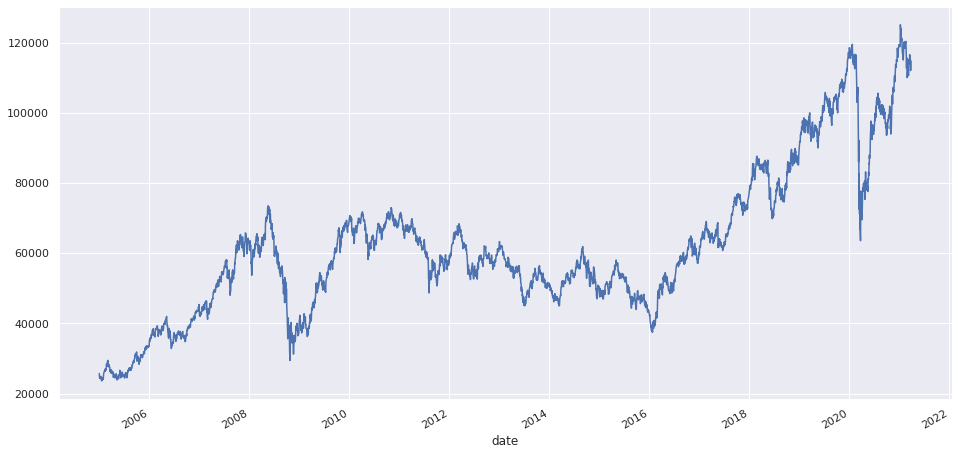

In [43]:
dados['4. close'].plot()

## 5. Observações

In [ ]:
'''
{
#Stock index symbols
NYSE = '^NYA'
TSX = '^GSPTSE'
SP_500 = '^GSPC'
DowJones = '^DJI'
Russell = '^RUT'
#NASDAQ INDEX MISSING
#NASDAQ = '^IXIC'
Nikkei = '^N225'
Bovespa = '^BVSP'
SP_BMV = '^MXX'
DAX = '^GDAXI'
FTSE = '^FTSE'
HangSeng = '^HSI'
China = 'XIN9.FGI'
BSE = '^BSESN'
KOSPI = '^KS11'
SP_ASX = '^AXJO'
FTSE_JSE = 'J203.L'
}
'''